In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report, recall_score, precision_score, f1_score

from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import RandomOverSampler

from nltk.corpus import stopwords
from imblearn.pipeline import Pipeline # Need to use the imblearn.pipeline since gridsearching over oversampled data

In [2]:
df = pd.read_csv('../data/reviews_with_ratings_cleaned.csv', index_col = 'Unnamed: 0', keep_default_na = False)
df.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,avg_rating,avg_score_below_4,avg_score_below_5th_percentile,comments_clean
82925,14233774,170890632,2017-07-16,114004588,Kayla,We loved staying at Alper's place. We got so m...,4.898571,0,0,we loved staying at alper s place we got so mu...
117811,18096306,688337141646144533,2022-08-07,29499820,Anne,Great location and great communication with Br...,4.904286,0,0,great location and great communication with brent
23318,3317645,765055811,2021-05-31,13956522,Jonathan,We enjoyed staying at Meseret’s place. The sp...,4.892857,0,0,we enjoyed staying at meseret s place the spac...
115308,17944480,1029327171690939454,2023-11-20,542791150,Alberto,"La habitación salvo por el frío que hace, sí q...",4.417143,0,1,la habitación salvo por el frío que hace sí qu...
133110,20138171,522448858874809964,2021-12-21,393031240,Ernie,"They were great at communication, and prompt i...",4.881429,0,0,they were great at communication and prompt in...


In [4]:
df.isnull().sum()

listing_id                        0
id                                0
date                              0
reviewer_id                       0
reviewer_name                     0
comments                          0
avg_rating                        0
avg_score_below_4                 0
avg_score_below_5th_percentile    0
comments_clean                    0
dtype: int64

In [5]:
print(df['avg_score_below_5th_percentile'].value_counts()),
print('*'*30)
df['avg_score_below_5th_percentile'].value_counts(normalize = True)

avg_score_below_5th_percentile
0    320774
1      2033
Name: count, dtype: int64
******************************


avg_score_below_5th_percentile
0    0.993702
1    0.006298
Name: proportion, dtype: float64

In [6]:
X = df[['comments_clean']] # Had to make it double square brackets to make it a 2D array
X.shape

(322807, 1)

In [7]:
y = df['avg_score_below_5th_percentile']
y.shape

(322807,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242105, 1), (80702, 1), (242105,), (80702,))

#### With oversampling so minority class is 25% of majority class, would make minority class at 60,145 observations in training set - or 39x current observations

#### With oversampling so minority is 10% of majority class, would make minority class at 24,058 observations in training set - or 16x current observations

In [10]:
y_train.value_counts(), y_test.value_counts()

(avg_score_below_5th_percentile
 0    240580
 1      1525
 Name: count, dtype: int64,
 avg_score_below_5th_percentile
 0    80194
 1      508
 Name: count, dtype: int64)

In [11]:
X_train

,comments_clean
67125,our client michael stayed for one evening and ...
63788,just a wonderful experience all around locatio...
20242,this airbnb was beautiful it is really close t...
160237,great stay
247799,super easy check in and great location
...,...
178131,jen and john s place is perfect for both perso...
103396,ashley has done a great job of selling her pla...
150074,this is the nicest basement apt in dc we ve st...
304472,i booked a last minute trip to d c and was loo...


In [12]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
new_stop_words = ['jasmine', 'poor', 'bad', 'terrible', 'worst', 'didn', 'wasn']
stop_words.append(new_stop_words)

In [14]:
added_stop_words = stop_words

#### Adding in Random Over Sampler into the GridSearch to see if instead of oversampling so the minority class is 1:1, having it at a lower ratio to reduce overfitting and false positives

In [15]:
pipe = Pipeline([
    ('tf', TfidfVectorizer() ),
    ('ros', RandomOverSampler(random_state = 42) ), # Need to make Random OverSampler before the logistic regression, but after the 
    ('logr', LogisticRegression() ) # Removed class_weight = 'balanced' since class weights
])

#### Ends up being 324 combinations to test (3 x 3 x 4 x 3 x 3) - plus 5 cross_val scores on each for 1,620 fits

In [16]:
pipe_params = {
    'ros__sampling_strategy' : [0.1, 0.25],  # Kept oversampling so majority class still dominant so not training too much on repeated observations of the same data
    'tf__stop_words' : ['english', 'added_stop_words'],
    'tf__max_features' : [5_000, 10_000, 30_000],
    'tf__min_df' : [50, 100],  # Higher minimums given the oversampling
    'tf__ngram_range': [ (1,1), (1,2), (1,3) ]
}

#### Added balanced accuracy to the Grid Search parameters

In [17]:
gs = GridSearchCV(pipe, pipe_params, n_jobs = -1, verbose = 10,
                 scoring = 'balanced_accuracy')

In [18]:
gs.fit(X_train['comments_clean'], y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\david\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\david\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    X, fitted_transformer 

GridSearchCV(estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('ros',
                                        RandomOverSampler(random_state=42)),
                                       ('logr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'ros__sampling_strategy': [0.1, 0.25],
                         'tf__max_features': [5000, 10000, 30000],
                         'tf__min_df': [50, 100],
                         'tf__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tf__stop_words': ['english', 'added_stop_words']},
             scoring='balanced_accuracy', verbose=10)

#### Best Params are ROS os 0.25, Max Features of 5000, min_df of 50, n_gram of 1,1, English stop words

In [19]:
gs.best_params_

{'ros__sampling_strategy': 0.25,
 'tf__max_features': 5000,
 'tf__min_df': 50,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': 'english'}

In [20]:
gs.best_score_

0.6133619231665551

In [21]:
gs.score(X_train['comments_clean'], y_train), gs.score(X_test['comments_clean'], y_test)

(0.8219581843877297, 0.6074159189555879)

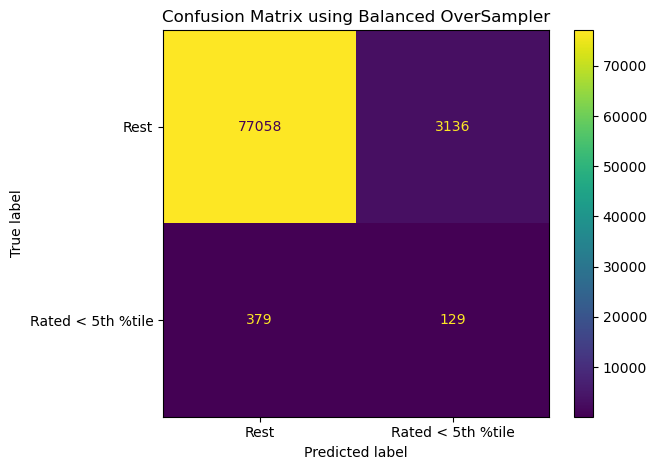

In [22]:
ConfusionMatrixDisplay.from_estimator(gs, X_test['comments_clean'], y_test,
                                     display_labels = ['Rest', 'Rated < 5th %tile']);

plt.title('Confusion Matrix using Balanced OverSampler')

plt.tight_layout()

plt.savefig('../images/09_random_oversample_confusion_matrix.png', dpi = 192);

In [23]:
recall_score(y_test, gs.predict(X_test['comments_clean']) )

0.25393700787401574

In [24]:
f1_score(y_test, gs.predict(X_test['comments_clean']) )

0.06838059899284389

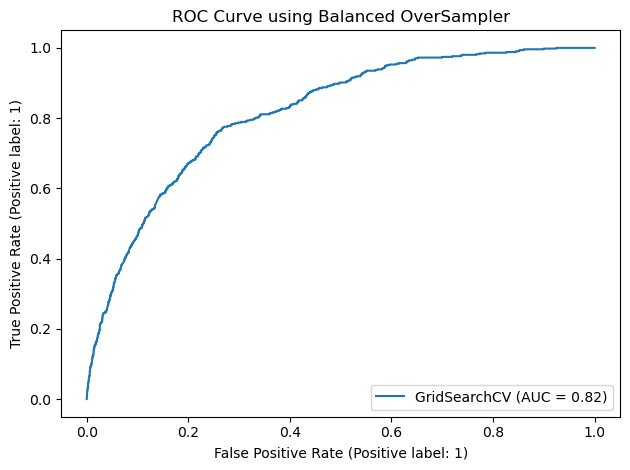

In [25]:
RocCurveDisplay.from_estimator(gs, X_test['comments_clean'], y_test)

plt.title('ROC Curve using Balanced OverSampler')

plt.tight_layout()

plt.savefig('../images/09_random_oversample_ROC_Curve.png', dpi = 192);

In [26]:
prob_df = pd.DataFrame(gs.predict_proba(gs.best_estimator_.named_steps.tf.get_feature_names_out() ), columns = ['above_5th_percentile', 'below_5th_percentile'])
prob_df

,above_5th_percentile,below_5th_percentile
0,0.978993,0.021007
1,0.857627,0.142373
2,0.983575,0.016425
3,0.930988,0.069012
4,0.920744,0.079256
...,...,...
4956,0.933946,0.066054
4957,0.947779,0.052221
4958,0.953763,0.046237
4959,0.961313,0.038687


In [27]:
feature_words = pd.DataFrame( gs.best_estimator_.named_steps.tf.get_feature_names_out(), columns = ['features'])
feature_words

,features
0,00
1,10
2,100
3,1000
4,10min
...,...
4956,все
4957,очень
4958,깨끗하고
4959,너무


In [28]:
word_probs = feature_words.join(prob_df)
word_probs.sort_values('above_5th_percentile', ascending = False).head(20)

,features,above_5th_percentile,below_5th_percentile
2832,michael,0.999887,0.000113
1257,dennis,0.999872,0.000128
1874,gary,0.999862,0.000138
862,circle,0.999795,0.000205
1200,david,0.999672,0.000328
3601,recommendations,0.999635,0.000365
3206,pass,0.999549,0.000451
4482,touches,0.999348,0.000652
289,appartement,0.999345,0.000655
850,chris,0.999145,0.000855


In [29]:
top_20_neg_predictors = word_probs.sort_values('below_5th_percentile', ascending = False).head(20)
top_20_neg_predictors = top_20_neg_predictors.sort_values('below_5th_percentile', ascending = True)

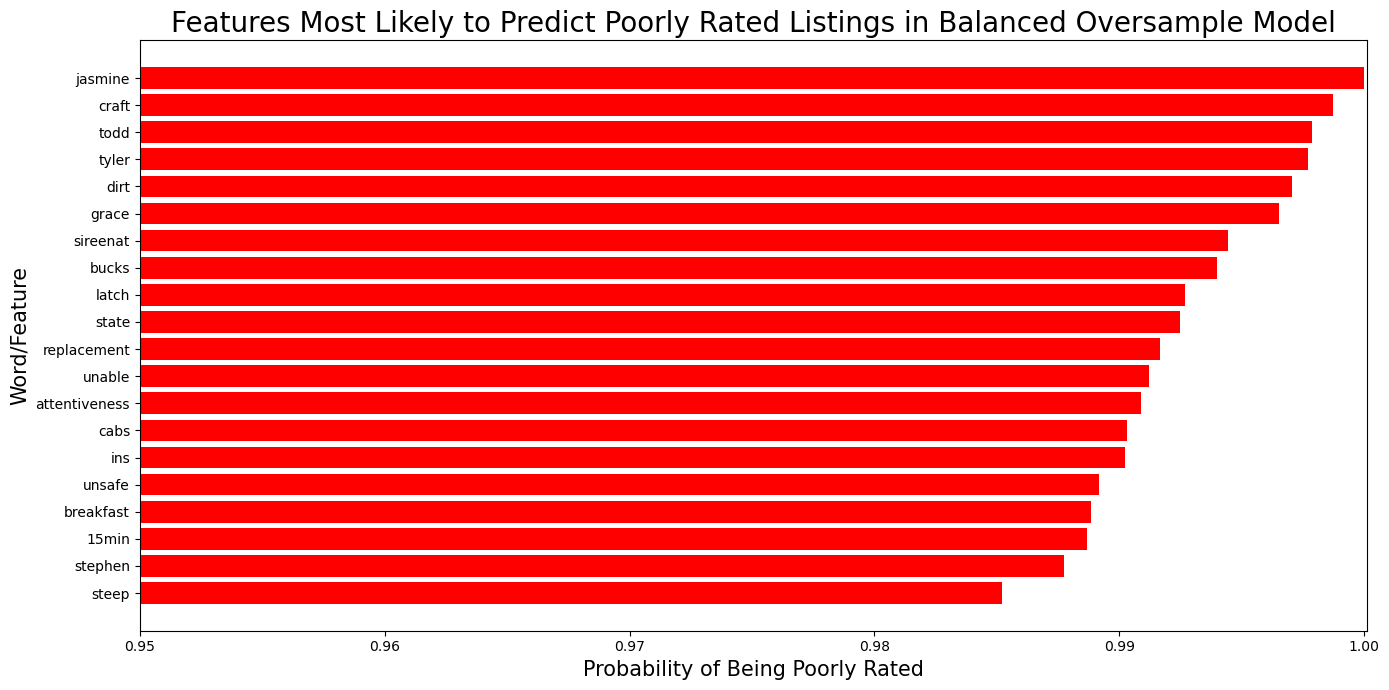

In [30]:
plt.figure(figsize = (14,7))

plt.barh(top_20_neg_predictors['features'],
        top_20_neg_predictors['below_5th_percentile'], color = 'red')

plt.xlim(0.95, 1.0001)
plt.xlabel('Probability of Being Poorly Rated', fontsize = 15)
plt.ylabel('Word/Feature', fontsize = 15)

plt.title('Features Most Likely to Predict Poorly Rated Listings in Balanced Oversample Model', fontsize = 20)

plt.tight_layout()

plt.savefig('../images/09_random_oversample_predicted_features.png', dpi = 192)

In [31]:
pd.set_option('display.max_colwidth', 400)
df[['avg_rating', 'avg_score_below_5th_percentile', 'comments_clean']] [df['comments_clean'].str.contains('breakfast')].sort_values('avg_rating')

,avg_rating,avg_score_below_5th_percentile,comments_clean
245182,3.342857,1,i stayed at this airbnb for about 1 month br pros fridge and microwave in your room the bus stop is close and will take you to the closest rail station br cons limited amenities although she advertised the washer and dryer she only allows you to use them 1 day a week she advertised wifi i shared with her that i needed good wifi due to work however when i got there her wifi did not work well wo...
319667,3.892857,1,i was really excited to try this place when i arrived to my room it s was filthy drugs and needles all over trash smelt like pee the atmosphere was very noisy and loud if i had know the location in advance i wouldn t have booked this area has a high homeless and drug population so i can only imagine who really rents this place br i reached out immediately i called several times and texted i ca...
292561,3.952857,1,great location if you are going to a nationals game rooftop area was only open from 5 to 10 so we could not enjoy it before or after the game room was very nice and clean the restaurant had staffing issues while we were there so it was only open for breakfast with one waitress
142704,4.054286,1,nice place good breakfast nice rooms everyone of the guest were nice and reapectful
72003,4.201429,1,as someone who stayed at this location for exactly 10 months i can provide the best description of this home and the host this was an absolute diamond in the a dirt field as a quick over night stay you won t have any regrets the hosts are very responsive the properly is clean and well kept and the other housemates are respectful and vetted as a long term stay 1 month or more this is the best s...
...,...,...,...
211961,5.000000,0,lucia was incredible so accommodating of my gluten intolerance when planning and making breakfast which was amazing by the way our room was really unique with original historic details location is kalorama cannot be beat
225878,5.000000,0,my stay at jonise s place was absolutely amazing she is by far the best airbnb host i have ever had after having a terrible airbnb experience the night before at another place she offered a prompt booking and allowed me to check in much earlier than her typical check in time jonise was very accommodating and she even provided a very well portioned breakfast daily during my stay if you are in t...
289472,5.000000,0,charming bed and breakfast located in a great location clean and very comfortable
321243,5.000000,0,we had a great stay with wolde and blaine they are quick to respond and very friendly and helpful with any questions we had their place is immaculate and had everything we needed the kitchen was great for making breakfast before we headed out for the day we especially appreciated all the places to plug in electronics both usb and usb c super helpful when everyone has multiple devices parking w...
